In [12]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
df = pd.read_csv('data1.csv')
print(df[0:10])

      X     Y  Class
0   5.5   7.0      1
1   9.4  13.0      1
2   6.0   6.8      1
3  12.5  13.0      0
4   5.5   5.6      1
5  13.5  16.0      0
6  11.5  15.0      0
7  13.2  13.4      0
8   6.8   9.0      1
9  10.0   8.0      0


In [14]:
features = df[['X', 'Y']]
target = df['Class']

# StandardScaler
scaler_standard = StandardScaler()
scaled_features_standard = pd.DataFrame(scaler_standard.fit_transform(features), columns=['X', 'Y'])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_features_minmax = pd.DataFrame(scaler_minmax.fit_transform(features), columns=['X', 'Y'])
#concat different parts
df_standard = pd.concat([scaled_features_standard, target], axis=1)
df_minmax = pd.concat([scaled_features_minmax, target], axis=1)


print("StandardScaler:")
print(df_standard.head())

StandardScaler:
          X         Y  Class
0 -0.813747 -0.357511      1
1 -0.126986  0.998022      1
2 -0.725701 -0.402696      1
3  0.418901  0.998022      0
4 -0.813747 -0.673802      1


In [15]:
print(df_minmax.head())

          X         Y  Class
0  0.279419  0.434318      1
1  0.481597  0.811439      1
2  0.305340  0.421747      1
3  0.642302  0.811439      0
4  0.279419  0.346323      1


In [25]:

def cluster(num_clusters):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_minmax[['X', 'Y']].T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)
    return cntr, u, u0, d, jm, p, fpc , cluster_membership


cntr, u, u0, d, jm, p, fpc , cluster_membership = cluster(2)
print(u)


[[6.79757058e-02 7.98809341e-01 6.70895158e-02 9.59784235e-01
  1.35685005e-02 9.23300688e-01 9.00139361e-01 9.74018041e-01
  2.87106344e-01 4.58270555e-01 9.04620549e-01 8.68017403e-01
  4.94407288e-02 8.76461933e-02 4.58592239e-02 7.80943849e-02
  5.37466924e-02 2.23127959e-01 1.20977523e-01 2.71815515e-01
  1.21587569e-02 1.43105530e-01 1.05473644e-01 1.44722302e-02
  6.67659561e-02 5.20599314e-02 8.54262292e-02 4.09111030e-02
  3.78657533e-01 1.40029191e-01 2.97595092e-02 6.80998193e-02
  2.31750830e-02 5.03357944e-04 1.83195404e-01 1.76339975e-02
  4.43950607e-02 1.64045512e-02 1.64299654e-02 3.46150632e-02
  1.27561326e-01 1.50745223e-01 2.85578356e-02 1.57715070e-01
  4.83910242e-02 6.16973449e-02 1.04913391e-01 1.75659428e-02
  1.16525972e-01 1.08185681e-01 1.32221751e-01 1.03834933e-01
  1.36079523e-01 1.55309135e-02 2.15709007e-02 4.65203262e-02
  2.82853302e-02 1.47822628e-02 7.84850096e-02 1.09996243e-01
  3.50819450e-01 3.55748360e-02 7.45236602e-02 4.06256967e-02
  7.2119

In [17]:
fpc_values = []
all_values = {}
for i in range(2,11): 
    cntr, u, u0, d, jm, p, fpc , cluster_membership = cluster(i)
    fpc_values.append(fpc)
    all_values[i] = (cntr, u, u0, d, jm, p, fpc , cluster_membership)


max(fpc_values)

0.868589716731304

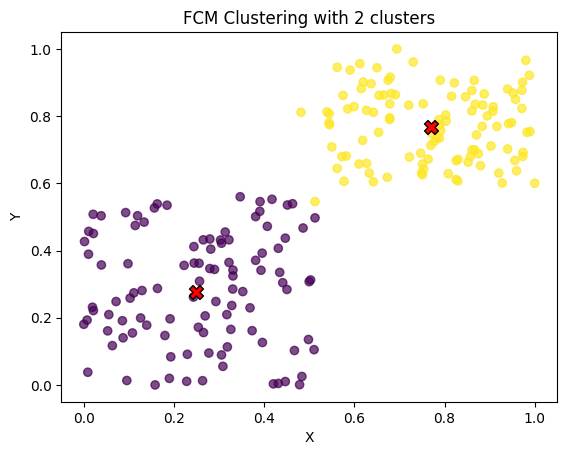

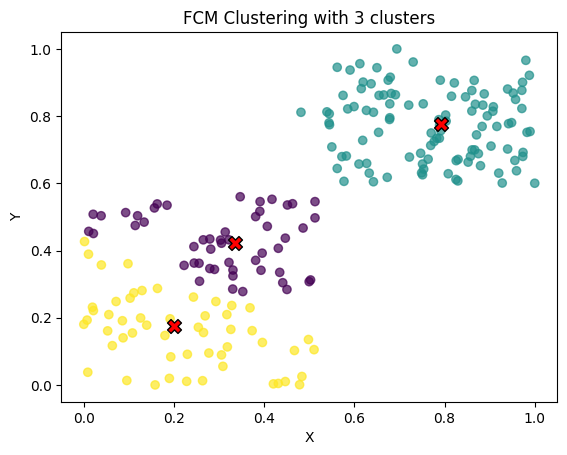

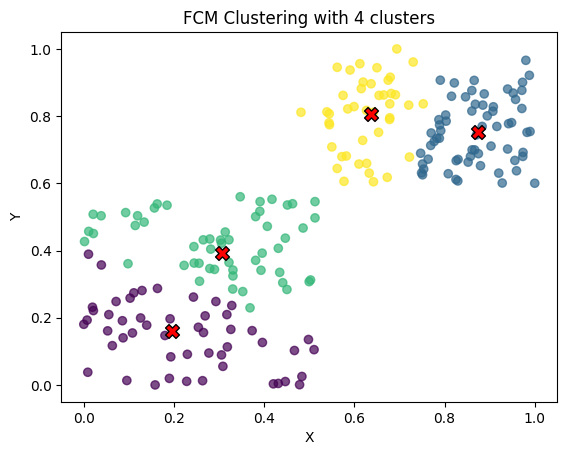

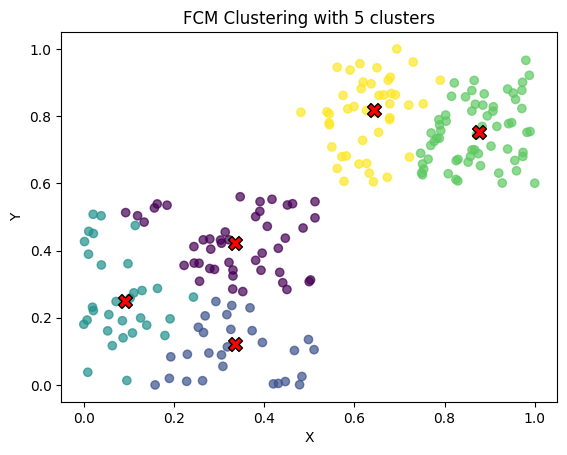

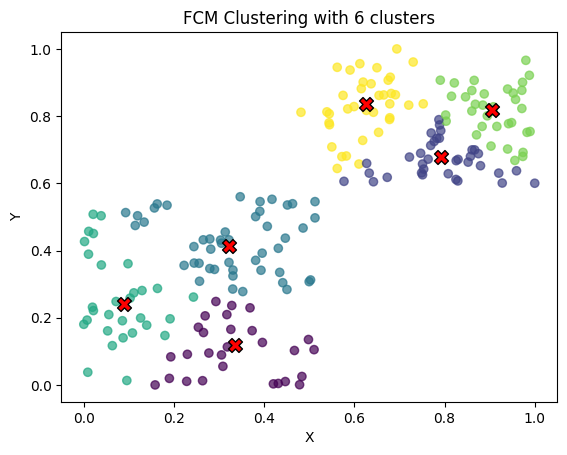

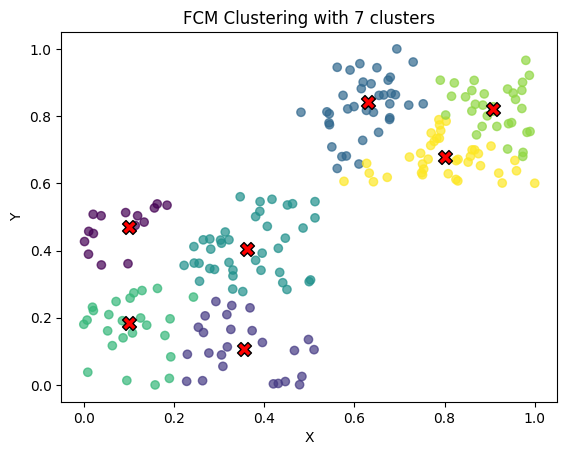

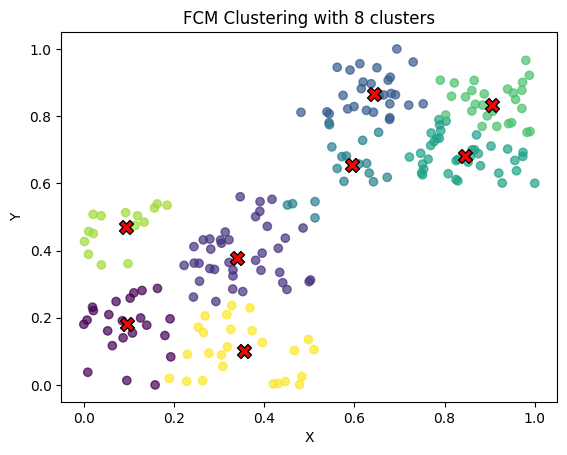

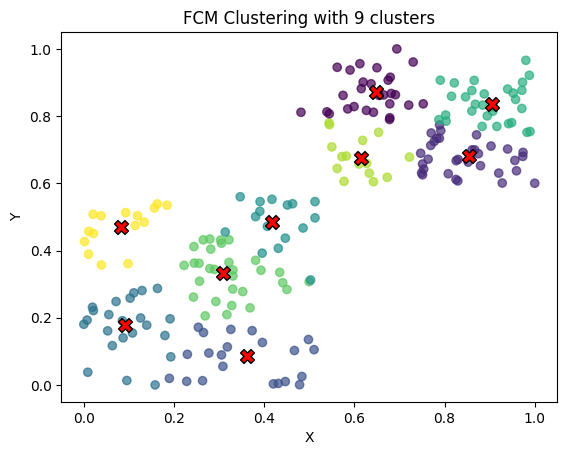

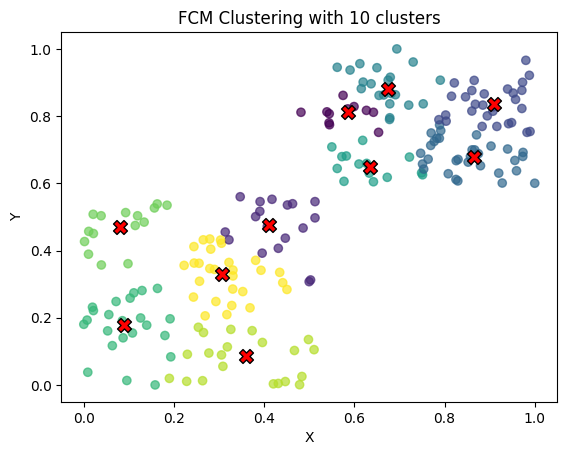

In [21]:
def visualize_fcm_clusters(num_clusters , df_minmax):
    cntr, u, u0, d, jm, p, fpc, cluster_membership = cluster(num_clusters)

  
    plt.scatter(df_minmax['X'], df_minmax['Y'], c=cluster_membership, cmap='viridis', alpha=0.7)
    
    # Plot cluster centers
    for cluster_center in cntr:
        plt.scatter(cluster_center[0], cluster_center[1], marker='X', s=100, c='red', edgecolors='black')

    plt.title(f'FCM Clustering with {num_clusters} clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


for num_clusters in range(2, 11):
    visualize_fcm_clusters(num_clusters , df_minmax)

9


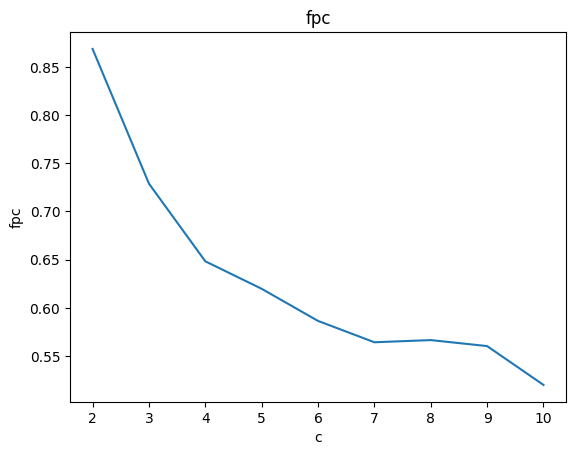

In [ ]:
print(len(fpc_values))
plt.plot(range(2,11), fpc_values)
plt.xlabel('c')
plt.ylabel('fpc')
plt.title('fpc')
plt.show()

In [ ]:
df = pd.read_csv('data2.csv')
features = df[['X', 'Y']]
target = df['Class']

# StandardScaler
scaler_standard = StandardScaler()
scaled_features_standard = pd.DataFrame(scaler_standard.fit_transform(features), columns=['X', 'Y'])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_features_minmax = pd.DataFrame(scaler_minmax.fit_transform(features), columns=['X', 'Y'])
#concat different parts
df_standard = pd.concat([scaled_features_standard, target], axis=1)
df_minmax = pd.concat([scaled_features_minmax, target], axis=1)


# print("StandardScaler:")
# print(df_standard.head())

In [ ]:

def cluster(num_clusters):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_minmax[['X', 'Y']].T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)
    return cntr, u, u0, d, jm, p, fpc , cluster_membership



fpc_values = []
for i in range(2,11): 
    cntr, u, u0, d, jm, p, fpc , cluster_membership = cluster(i)
    fpc_values.append(fpc)

max(fpc_values)

0.7066684195551128

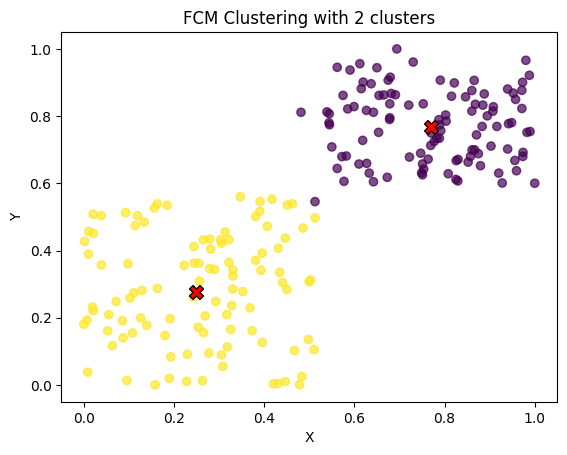

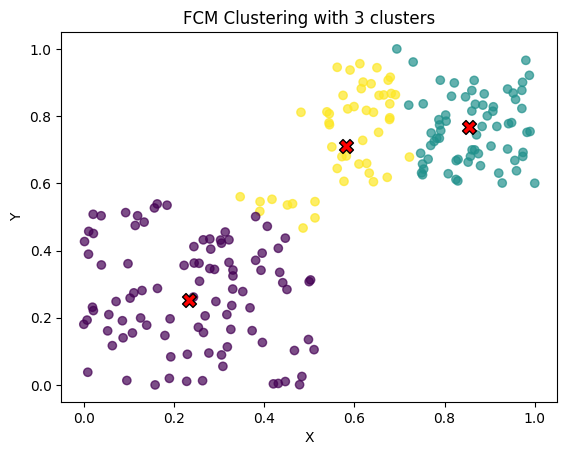

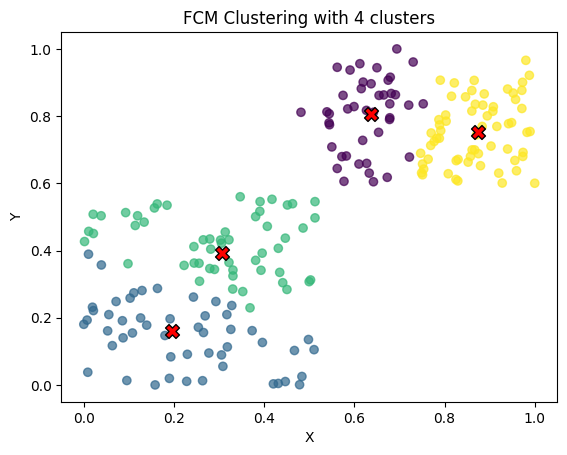

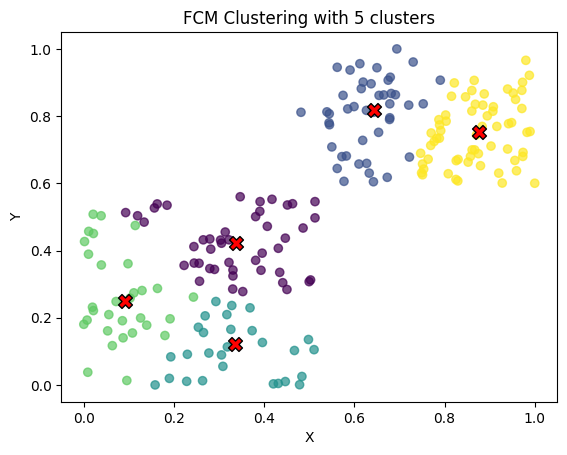

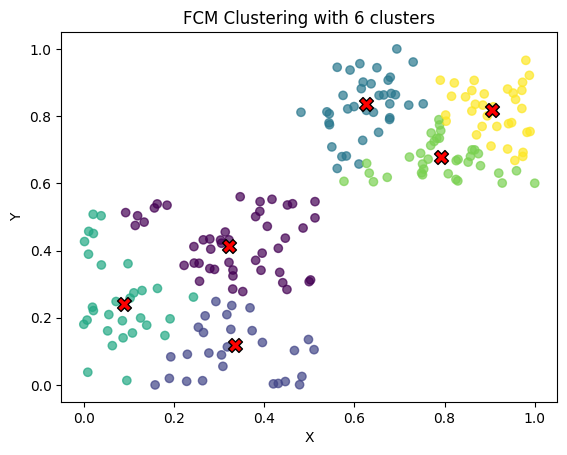

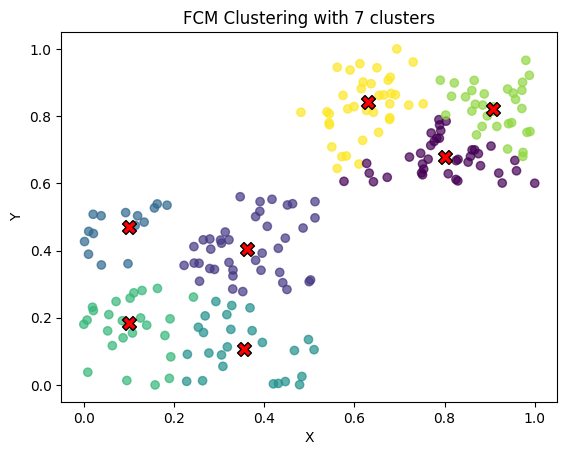

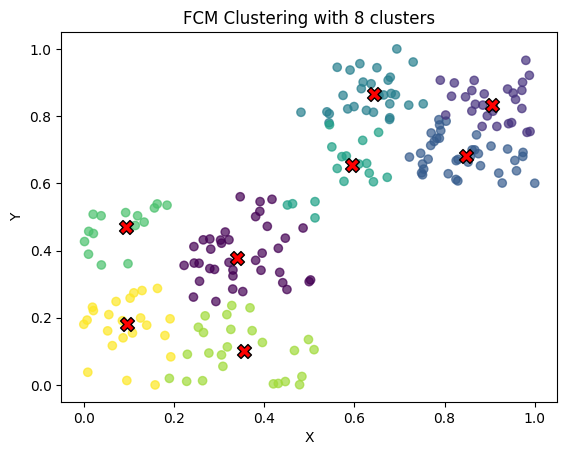

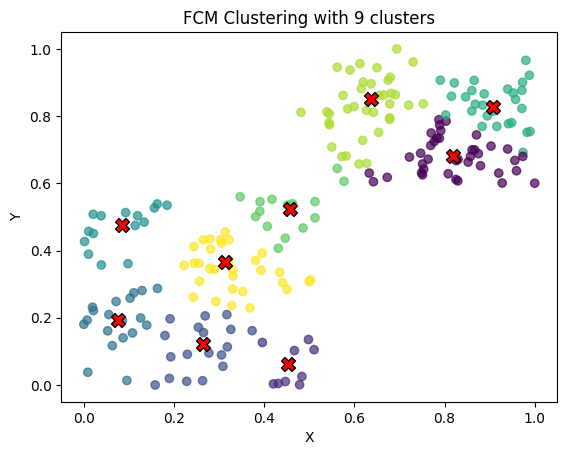

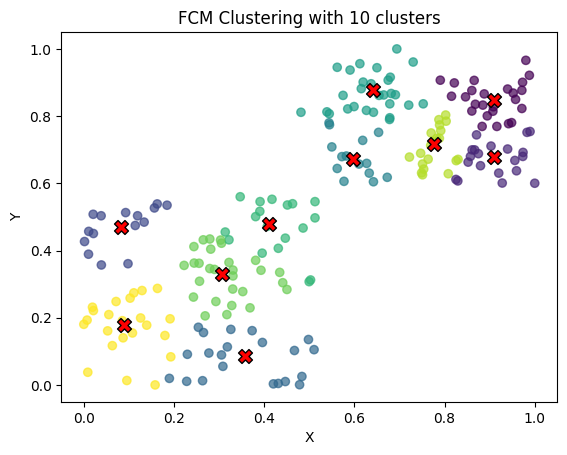

In [22]:

for num_clusters in range(2, 11):
    visualize_fcm_clusters(num_clusters , df_minmax)

9


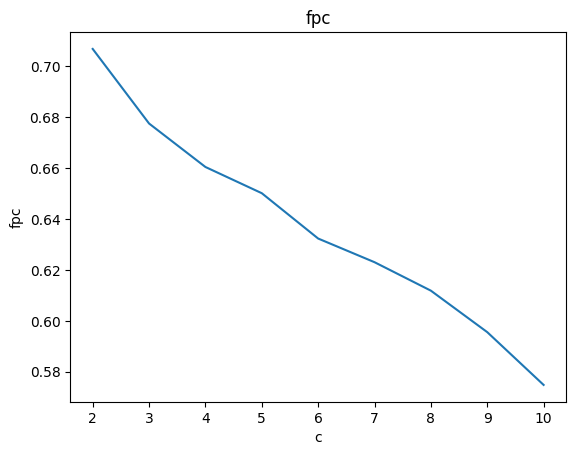

In [ ]:
print(len(fpc_values))
plt.plot(range(2,11), fpc_values)
plt.xlabel('c')
plt.ylabel('fpc')
plt.title('fpc')
plt.show()